In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression

In [ ]:
!pip install ucimlrepo

In [ ]:
df = pd.read_csv('/content/dataset.csv')

In [ ]:
df = df.drop('label.1', axis=1)

In [ ]:
df.head(10)

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,ObfuscationRatio,NoOfLettersInURL,LetterRatioInURL,NoOfDegitsInURL,DegitRatioInURL,NoOfEqualsInURL,NoOfQMarkInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,SpacialCharRatioInURL,IsHTTPS,LineOfCode,LargestLineLength,HasTitle,Title,DomainTitleMatchScore,URLTitleMatchScore,HasFavicon,Robots,IsResponsive,NoOfURLRedirect,NoOfSelfRedirect,HasDescription,NoOfPopup,NoOfiFrame,HasExternalFormSubmit,HasSocialNet,HasSubmitButton,HasHiddenFields,HasPasswordField,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,0.061933,3,1,0,0,0.0,18,0.581,0,0.0,0,0,0,1,0.032,1,558,9381,1,à¸‚à¹ˆà¸²à¸§à¸ªà¸” à¸‚à¹ˆà¸²à¸§à¸§à¸±à¸™à¸™à¸µà¹‰ à¸‚à¹ˆà¸²à¸§à¸à¸µà¸¬à¸² à¸‚à¹ˆà¸²à¸§à¸šà¸±à¸™à¹€à¸—à¸´à¸‡ à¸­à¸±à¸žà¹€à¸”à¸—à¸ªà¸”à¹ƒà¸«à¸¡à¹ˆà¸—à¸¸à¸à¸§à¸±à¸™ &#8211; à¸‚à¹ˆà¸²à¸§à¸ªà¸” à¸‚à¹ˆà¸²à¸§à¸à¸µà¸¬à¸² à¸‚à¹ˆà¸²à¸§à¸šà¸±à¸™à¹€à¸—à¸´à¸‡ à¸‚à¹ˆà¸²à¸§à¸§à¸±à¸™à¸™à¸µà¹‰ à¸­à¸±à¸›à¹€à¸”à¸•à¸‚à¹ˆà¸²à¸§à¸ªà¸²à¸£à¸£à¸§à¸”à¹€à¸£à¹‡à¸§à¸—à¸±à¸™à¹ƒà¸ˆ à¸žà¸£à¹‰à¸­à¸¡à¸£à¸±à¸šà¸Šà¸¡à¸ªà¸²à¸£à¸°à¸™à¹ˆà¸²à¸£à¸¹à¹‰à¸•à¹ˆà¸²à¸‡à¹† à¹„à¸”à¹‰à¸Ÿà¸£à¸µà¸•à¸¥à¸­à¸” 24à¸Šà¸±à¹ˆà¸§à¹‚à¸¡à¸‡,0.000000,0.000000,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,0.050207,2,1,0,0,0.0,9,0.391,0,0.0,0,0,0,2,0.087,1,618,9381,1,johannes gutenberg-universitÃ¤t mainz,55.555556,55.555556,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,0.064129,2,2,0,0,0.0,15,0.517,0,0.0,0,0,0,2,0.069,1,467,682,1,voice fm southampton,46.666667,46.666667,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,0.057606,3,1,0,0,0.0,13,0.500,0,0.0,0,0,0,1,0.038,1,6356,26824,1,home page: seminars in fetal and neonatal medicine,0.000000,0.000000,0,1,1,0,0,0,1,12,0,1,1,1,0,0,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,0.059441,3,1,0,0,0.0,20,0.606,0,0.0,0,0,0,1,0.030,1,6089,28404,1,fundaciÃ³n rewilding argentina,100.000000,100.000000,0,1,1,1,1,1,0,2,0,1,1,1,0,1,1,0,1,244,15,34,72,1,85,1
5,23107.txt,https://www.globalreporting.org,30,www.globalreporting.org,23,0,org,100.0,1.000000,0.079963,0.060614,3,1,0,0,0.0,17,0.567,0,0.0,0,0,0,1,0.033,1,1210,737,1,gri - home,0.000000,0.000000,0,0,1,0,0,1,1,1,0,1,0,1,0,0,0,0,1,35,1,11,86,0,14,1
6,23034.txt,https://www.saffronart.com,25,www.saffronart.com,18,0,com,100.0,1.000000,0.522907,0.063549,3,1,0,0,0.0,12,0.480,0,0.0,0,0,0,1,0.040,1,1024,984,1,0,0.000000,0.000000,1,0,1,1,1,0,2,4,0,1,0,1,0,0,0,0,1,32,4,14,44,2,17,1
7,696732.txt,https://www.nerdscandy.com,25,www.nerdscandy.com,18,0,com,100.0,1.000000,0.522907,0.060486,3,1,0,0,0.0,12,0.480,0,0.0,0,0,0,1,0.040,1,514,399,1,nerds candy,100.000000,100.000000,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,1,24,2,22,36,0,15,1
8,739255.txt,https://www.hyderabadonline.in,29,www.hyderabadonline.in,22,0,in,100.0,1.000000,0.005084,0.056980,2,1,0,0,0.0,16,0.552,0,0.0,0,0,0,1,0.034,1,2371,12913,1,"hyderabadonline - business listing in hyderabad, hyderabad news, the fort of golconda, travel guide",100.000000,100.000000,0,1,1,0,0,1,0,0,0,1,1,1,1,0,0,0,1,71,4,9,40,1,317,1
9,14486.txt,https://www.aap.org,18,www.aap.org,11,0,org,100.0,1.000000,0.079963,0.070497,3,1,0,0,0.0,5,0.278,0,0.0,0,0,0,1,0.056,1,2730,481,1,home,0.000000,0.000000,1,1,1,0,0,1,0,2,0,1,0,0,0,0,0,0,1,10,1,12,173,6,65,1


In [ ]:
import pandas as pd

pd.set_option('display.max_row', 10)
pd.set_option('display.max_column', None)
pd.set_option('display.max_colwidth', None)


display(df)

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,ObfuscationRatio,NoOfLettersInURL,LetterRatioInURL,NoOfDegitsInURL,DegitRatioInURL,NoOfEqualsInURL,NoOfQMarkInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,SpacialCharRatioInURL,IsHTTPS,LineOfCode,LargestLineLength,HasTitle,Title,DomainTitleMatchScore,URLTitleMatchScore,HasFavicon,Robots,IsResponsive,NoOfURLRedirect,NoOfSelfRedirect,HasDescription,NoOfPopup,NoOfiFrame,HasExternalFormSubmit,HasSocialNet,HasSubmitButton,HasHiddenFields,HasPasswordField,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.000000,1.000000,0.522907,0.061933,3,1,0,0,0.0,18,0.581,0,0.000,0,0,0,1,0.032,1,558,9381,1,à¸‚à¹ˆà¸²à¸§à¸ªà¸” à¸‚à¹ˆà¸²à¸§à¸§à¸±à¸™à¸™à¸µà¹‰ à¸‚à¹ˆà¸²à¸§à¸à¸µà¸¬à¸² à¸‚à¹ˆà¸²à¸§à¸šà¸±à¸™à¹€à¸—à¸´à¸‡ à¸­à¸±à¸žà¹€à¸”à¸—à¸ªà¸”à¹ƒà¸«à¸¡à¹ˆà¸—à¸¸à¸à¸§à¸±à¸™ &#8211; à¸‚à¹ˆà¸²à¸§à¸ªà¸” à¸‚à¹ˆà¸²à¸§à¸à¸µà¸¬à¸² à¸‚à¹ˆà¸²à¸§à¸šà¸±à¸™à¹€à¸—à¸´à¸‡ à¸‚à¹ˆà¸²à¸§à¸§à¸±à¸™à¸™à¸µà¹‰ à¸­à¸±à¸›à¹€à¸”à¸•à¸‚à¹ˆà¸²à¸§à¸ªà¸²à¸£à¸£à¸§à¸”à¹€à¸£à¹‡à¸§à¸—à¸±à¸™à¹ƒà¸ˆ à¸žà¸£à¹‰à¸­à¸¡à¸£à¸±à¸šà¸Šà¸¡à¸ªà¸²à¸£à¸°à¸™à¹ˆà¸²à¸£à¸¹à¹‰à¸•à¹ˆà¸²à¸‡à¹† à¹„à¸”à¹‰à¸Ÿà¸£à¸µà¸•à¸¥à¸­à¸” 24à¸Šà¸±à¹ˆà¸§à¹‚à¸¡à¸‡,0.000000,0.000000,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.000000,0.666667,0.032650,0.050207,2,1,0,0,0.0,9,0.391,0,0.000,0,0,0,2,0.087,1,618,9381,1,johannes gutenberg-universitÃ¤t mainz,55.555556,55.555556,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.000000,0.866667,0.028555,0.064129,2,2,0,0,0.0,15,0.517,0,0.000,0,0,0,2,0.069,1,467,682,1,voice fm southampton,46.666667,46.666667,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.000000,1.000000,0.522907,0.057606,3,1,0,0,0.0,13,0.500,0,0.000,0,0,0,1,0.038,1,6356,26824,1,home page: seminars in fetal and neonatal medicine,0.000000,0.000000,0,1,1,0,0,0,1,12,0,1,1,1,0,0,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.000000,1.000000,0.079963,0.059441,3,1,0,0,0.0,20,0.606,0,0.000,0,0,0,1,0.030,1,6089,28404,1,fundaciÃ³n rewilding argentina,100.000000,100.000000,0,1,1,1,1,1,0,2,0,1,1,1,0,1,1,0,1,244,15,34,72,1,85,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,660997.txt,https://www.skincareliving.com,29,www.skincareliving.com,22,0,com,100.000000,1.000000,0.522907,0.058739,3,1,0,0,0.0,16,0.552,0,0.000,0,0,0,1,0.034,1,2007,9381,1,skincareliving,100.000000,100.000000,1,1,1,0,0,1,0,0,0,1,1,1,0,0,1,0,1,51,7,21,187,2,191,1
235791,77185.txt,https://www.winchester.gov.uk,28,www.winchester.gov.uk,21,0,uk,100.000000,0.785714,0.028555,0.053834,2,2,0,0,0.0,14,0.500,0,0.000,0,0,0,2,0.071,1,1081,348,1,winchestergov,0.000000,0.000000,1,0,1,0,0,1,0,0,0,1,1,1,0,0,1,0,0,50,1,7,88,0,31,1
235792,622132.txt,https://www.nononsensedesign.be,30,www.nononsensedesign.be,23,0,be,100.000000,1.000000,0.003319,0.063093,2,1,0,0,0.0,17,0.567,0,0.000,0,0,0,1,0.033,1,709,13277,1,nononsensedesign,100.000000,100.000000,1,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,27,10,30,58,2,67,1
235793,7503962.txt,https://patient-cell-40f5.updatedlogmylogin.workers.dev/,55,patient-cell-40f5.updatedlogmylogin.workers.dev,47,0,dev,28.157537,0.465116,0.000961,0.050211,3,2,0,0,0.0,39,0.709,3,0.055,0,0,0,5,0.091,1,125,1807,1,patient-cell-40f5updatedlogmyloginworkers,0.000000,0.000000,0,0,1,0,0,0,0,2,0,0,1,1,1,0,0,0,0,0,0,3,0,0,0,0


# **Data Understanding**

In [ ]:
num_rows = len(df)
num_columns = len(df.columns)

print(f"jumlah rows = {num_rows}")
print(f"jumlah columns = {num_columns}")

jumlah rows = 235795
jumlah columns = 56


In [ ]:
print(df.duplicated().count())

235795


In [ ]:
numerik = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
print(numerik)

['URLLength', 'DomainLength', 'IsDomainIP', 'URLSimilarityIndex', 'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain', 'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength', 'HasTitle', 'DomainTitleMatchScore', 'URLTitleMatchScore', 'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef', 'label']


In [ ]:
selected_features = [
    'URLLength',
    'DomainLength',
    'NoOfSubDomain',
    'IsDomainIP',
    'TLD',
    'TLDLength',
    'URLSimilarityIndex',
    'TLDLegitimateProb',
    'URLCharProb',
    'CharContinuationRate',
    'HasObfuscation',
    'NoOfObfuscatedChar',
    'ObfuscationRatio',
    'LetterRatioInURL',
    'SpacialCharRatioInURL',
    'NoOfOtherSpecialCharsInURL'
]


***Exploratory Data Analysis (EDA)***

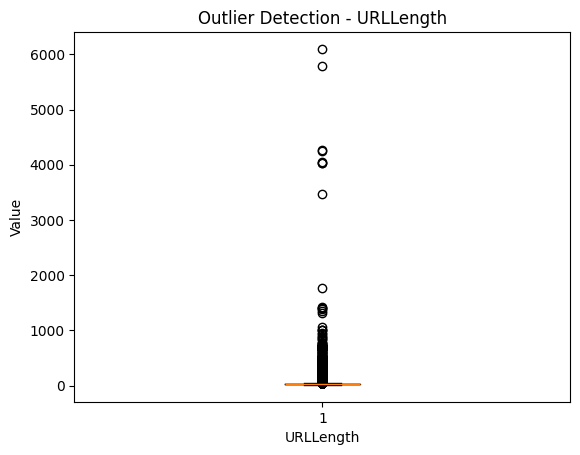

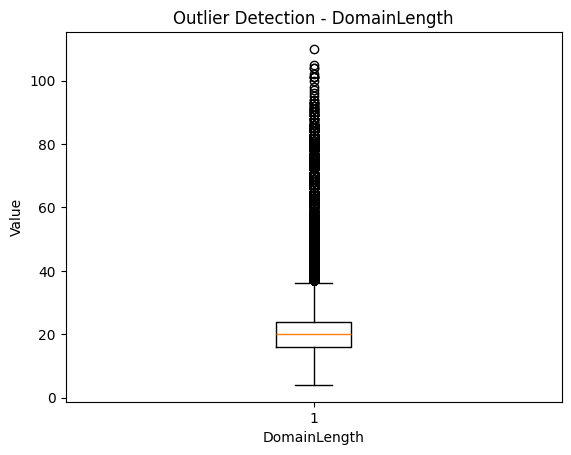

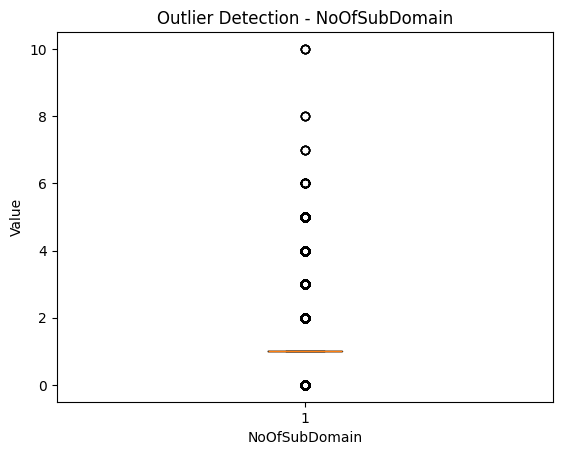

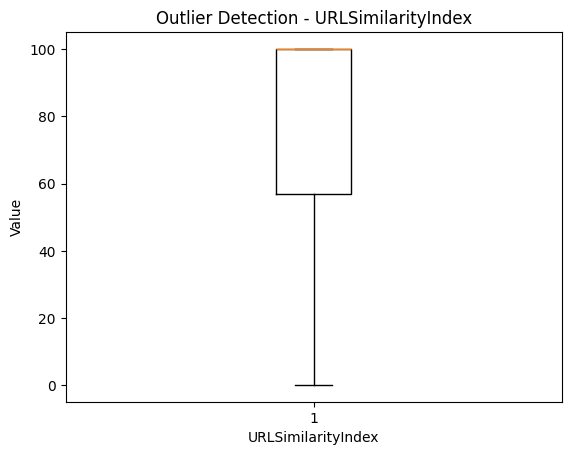

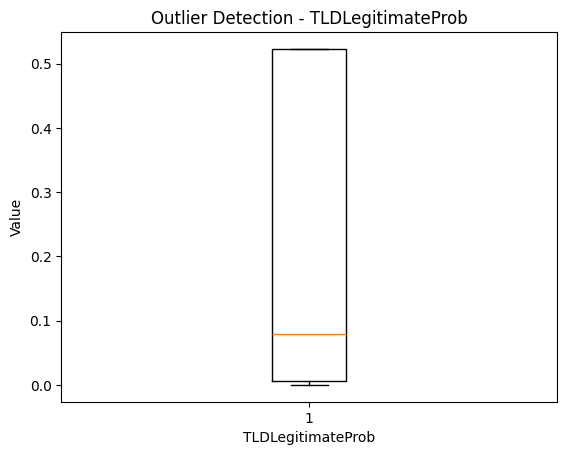

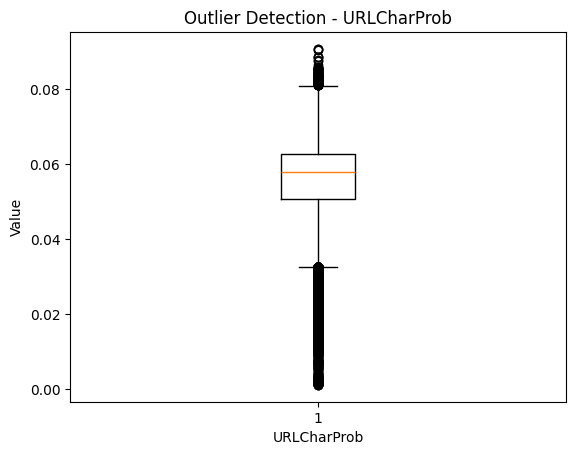

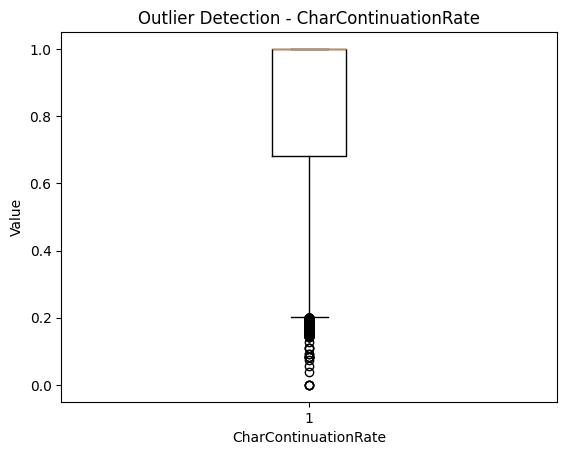

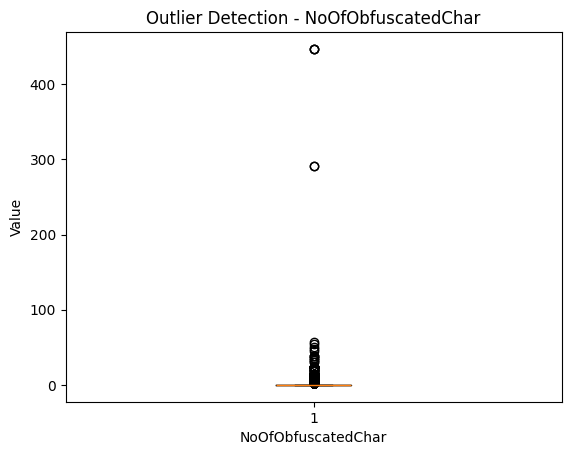

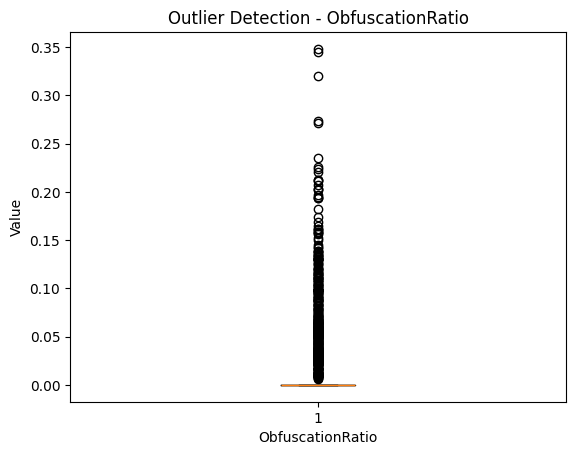

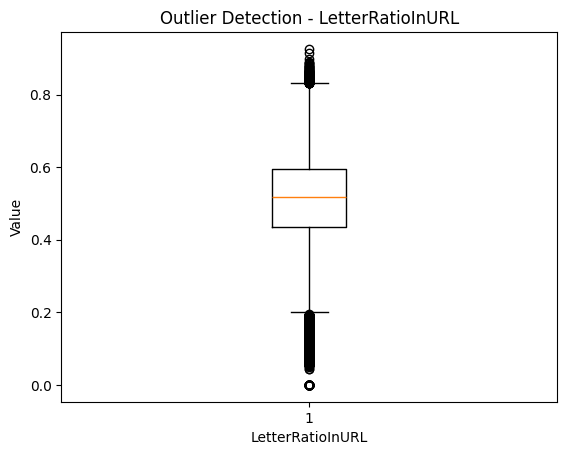

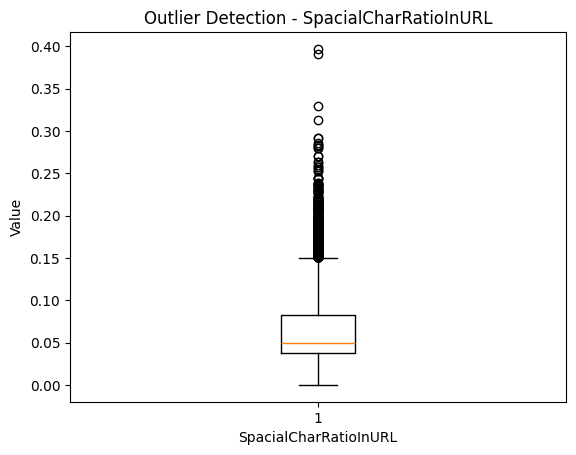

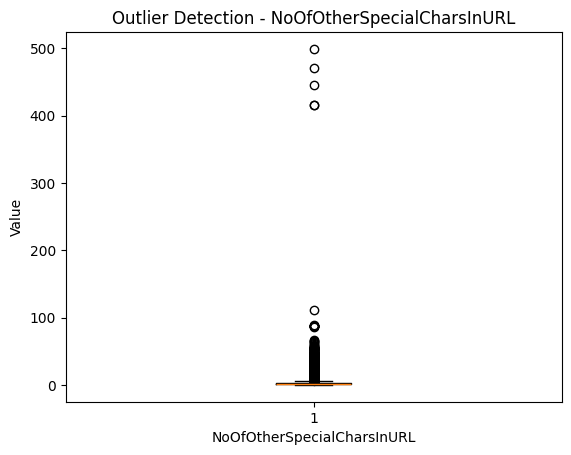

In [ ]:
#@title Boxplot "Outlier Detection"

outlier_features = [
    'URLLength',
    'DomainLength',
    'NoOfSubDomain',
    'URLSimilarityIndex',
    'TLDLegitimateProb',
    'URLCharProb',
    'CharContinuationRate',
    'NoOfObfuscatedChar',
    'ObfuscationRatio',
    'LetterRatioInURL',
    'SpacialCharRatioInURL',
    'NoOfOtherSpecialCharsInURL'
]

for col in outlier_features:
    plt.figure()
    plt.boxplot(df[col].dropna())
    plt.title(f'Outlier Detection - {col}')
    plt.xlabel(col)
    plt.ylabel('Value')
    plt.show()

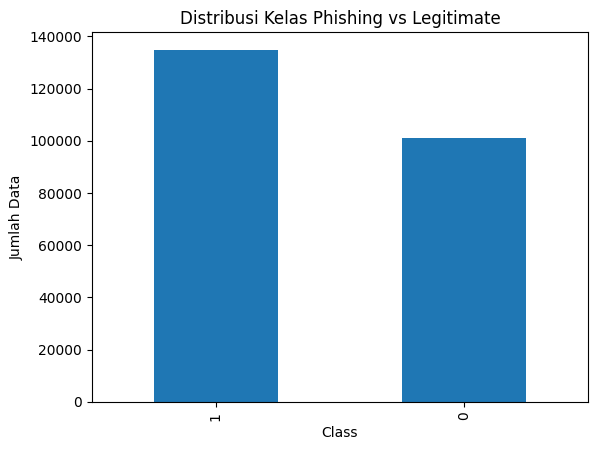

In [ ]:
#@title Class Distribution "Distribusi Kelas Phishing vs Legitimate"

df['label'].value_counts().plot(kind='bar')
plt.title('Distribusi Kelas Phishing vs Legitimate')
plt.xlabel('Class')
plt.ylabel('Jumlah Data')
plt.show()

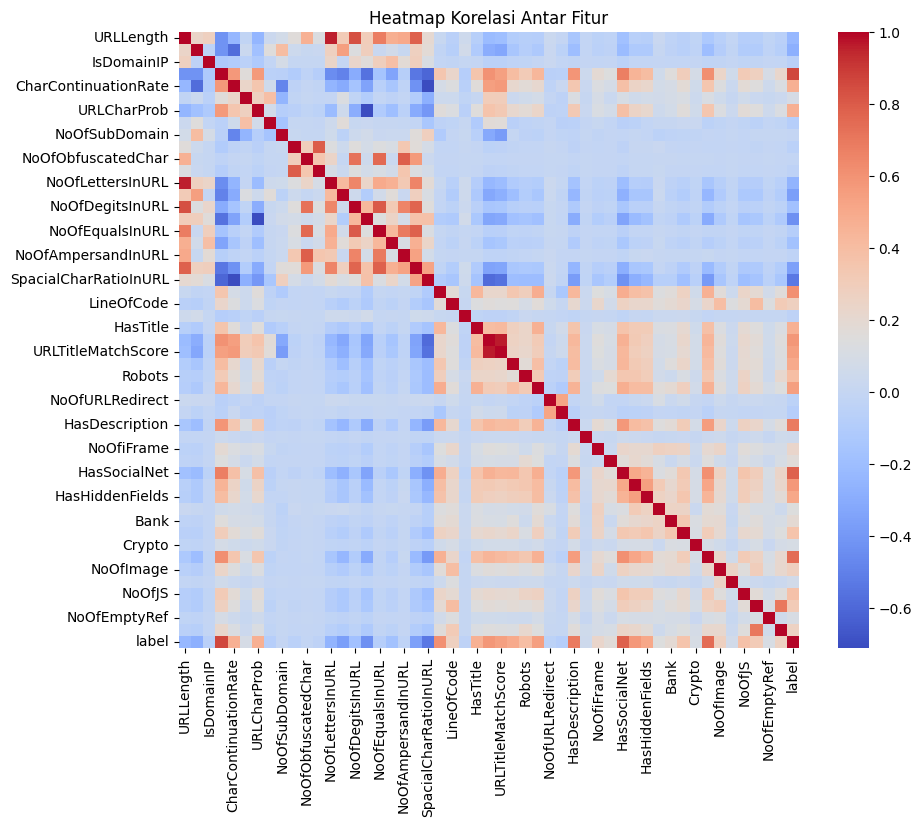

In [ ]:
#=========================================================
df_drop = df.select_dtypes(include=['int64', 'float64'])#=
#=========================================================
plt.figure(figsize=(10,8))
sns.heatmap(df_drop.corr(), cmap='coolwarm')
plt.title('Heatmap Korelasi Antar Fitur')
plt.show()

# **DATA PREPARATION**

### ***DATA CLEANING***

In [ ]:
#@title Missing Values

missing_value = df.isnull().sum()

if missing_value.sum() > 0:
    print("Terdapat missing values pada kolom berikut:\n")
    for i, (col, val) in enumerate(missing_value.items(), start=1):
        if val > 0:
            print(f"{i}. {col} : {val} missing values")
else:
    print("Tidak ada missing values pada seluruh kolom.")

Tidak ada missing values pada seluruh kolom.


In [ ]:
#@title Duplicates

duplicates = df.duplicated().sum()
print(duplicates)

0


In [ ]:
#@title outliers

#-

### ***FEATURE ENGINEERING***

In [ ]:
df_fe = df.copy()

In [ ]:
#@title Creating new features

df_fe['SpecialCharRatio'] = (
    df_fe['NoOfOtherSpecialCharsInURL'] / df_fe['URLLength']
)

df_fe['IsComplexURL'] = (
    (df_fe['NoOfSubDomain'] > 2) |
    (df_fe['NoOfURLRedirect'] > 0)
).astype(int)

df_fe['HasFinancialKeyword'] = (
    (df_fe['Bank'] == 1) |
    (df_fe['Pay'] == 1) |
    (df_fe['Crypto'] == 1)
).astype(int)

df_fe['LowContentQualityFlag'] = (
    (df_fe['HasTitle'] == 0) &
    (df_fe['HasDescription'] == 0) &
    (df_fe['HasCopyrightInfo'] == 0)
).astype(int)

display(df_fe)

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,ObfuscationRatio,NoOfLettersInURL,LetterRatioInURL,NoOfDegitsInURL,DegitRatioInURL,NoOfEqualsInURL,NoOfQMarkInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,SpacialCharRatioInURL,IsHTTPS,LineOfCode,LargestLineLength,HasTitle,Title,DomainTitleMatchScore,URLTitleMatchScore,HasFavicon,Robots,IsResponsive,NoOfURLRedirect,NoOfSelfRedirect,HasDescription,NoOfPopup,NoOfiFrame,HasExternalFormSubmit,HasSocialNet,HasSubmitButton,HasHiddenFields,HasPasswordField,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label,SpecialCharRatio,IsComplexURL,HasFinancialKeyword,LowContentQualityFlag
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.000000,1.000000,0.522907,0.061933,3,1,0,0,0.0,18,0.581,0,0.000,0,0,0,1,0.032,1,558,9381,1,à¸‚à¹ˆà¸²à¸§à¸ªà¸” à¸‚à¹ˆà¸²à¸§à¸§à¸±à¸™à¸™à¸µà¹‰ à¸‚à¹ˆà¸²à¸§à¸à¸µà¸¬à¸² à¸‚à¹ˆà¸²à¸§à¸šà¸±à¸™à¹€à¸—à¸´à¸‡ à¸­à¸±à¸žà¹€à¸”à¸—à¸ªà¸”à¹ƒà¸«à¸¡à¹ˆà¸—à¸¸à¸à¸§à¸±à¸™ &#8211; à¸‚à¹ˆà¸²à¸§à¸ªà¸” à¸‚à¹ˆà¸²à¸§à¸à¸µà¸¬à¸² à¸‚à¹ˆà¸²à¸§à¸šà¸±à¸™à¹€à¸—à¸´à¸‡ à¸‚à¹ˆà¸²à¸§à¸§à¸±à¸™à¸™à¸µà¹‰ à¸­à¸±à¸›à¹€à¸”à¸•à¸‚à¹ˆà¸²à¸§à¸ªà¸²à¸£à¸£à¸§à¸”à¹€à¸£à¹‡à¸§à¸—à¸±à¸™à¹ƒà¸ˆ à¸žà¸£à¹‰à¸­à¸¡à¸£à¸±à¸šà¸Šà¸¡à¸ªà¸²à¸£à¸°à¸™à¹ˆà¸²à¸£à¸¹à¹‰à¸•à¹ˆà¸²à¸‡à¹† à¹„à¸”à¹‰à¸Ÿà¸£à¸µà¸•à¸¥à¸­à¸” 24à¸Šà¸±à¹ˆà¸§à¹‚à¸¡à¸‡,0.000000,0.000000,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,0,1,34,20,28,119,0,124,1,0.032258,0,1,0
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.000000,0.666667,0.032650,0.050207,2,1,0,0,0.0,9,0.391,0,0.000,0,0,0,2,0.087,1,618,9381,1,johannes gutenberg-universitÃ¤t mainz,55.555556,55.555556,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,50,9,8,39,0,217,1,0.086957,0,0,0
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.000000,0.866667,0.028555,0.064129,2,2,0,0,0.0,15,0.517,0,0.000,0,0,0,2,0.069,1,467,682,1,voice fm southampton,46.666667,46.666667,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,10,2,7,42,2,5,1,0.068966,0,0,0
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.000000,1.000000,0.522907,0.057606,3,1,0,0,0.0,13,0.500,0,0.000,0,0,0,1,0.038,1,6356,26824,1,home page: seminars in fetal and neonatal medicine,0.000000,0.000000,0,1,1,0,0,0,1,12,0,1,1,1,0,0,1,1,1,3,27,15,22,1,31,1,0.038462,0,1,0
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.000000,1.000000,0.079963,0.059441,3,1,0,0,0.0,20,0.606,0,0.000,0,0,0,1,0.030,1,6089,28404,1,fundaciÃ³n rewilding argentina,100.000000,100.000000,0,1,1,1,1,1,0,2,0,1,1,1,0,1,1,0,1,244,15,34,72,1,85,1,0.030303,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,660997.txt,https://www.skincareliving.com,29,www.skincareliving.com,22,0,com,100.000000,1.000000,0.522907,0.058739,3,1,0,0,0.0,16,0.552,0,0.000,0,0,0,1,0.034,1,2007,9381,1,skincareliving,100.000000,100.000000,1,1,1,0,0,1,0,0,0,1,1,1,0,0,1,0,1,51,7,21,187,2,191,1,0.034483,0,1,0
235791,77185.txt,https://www.winchester.gov.uk,28,www.winchester.gov.uk,21,0,uk,100.000000,0.785714,0.028555,0.053834,2,2,0,0,0.0,14,0.500,0,0.000,0,0,0,2,0.071,1,1081,348,1,winchestergov,0.000000,0.000000,1,0,1,0,0,1,0,0,0,1,1,1,0,0,1,0,0,50,1,7,88,0,31,1,0.071429,0,1,0
235792,622132.txt,https://www.nononsensedesign.be,30,www.nononsensedesign.be,23,0,be,100.000000,1.000000,0.003319,0.063093,2,1,0,0,0.0,17,0.567,0,0.000,0,0,0,1,0.033,1,709,13277,1,nononsensedesign,100.000000,100.000000,1,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,27,10,30,58,2,67,1,0.033333,0,0,0
235793,7503962.txt,https://patient-cell-40f5.updatedlogmylogin.workers.dev/,55,patient-cell-40f5.updatedlogmylogin.workers.dev,47,0,dev,28.157537,0.465116,0.000961,0

In [ ]:
#@title FEATURE EXTRACTION

if 'Domain' in df_fe.columns:
    df_fe['DomainLength'] = df_fe['Domain'].astype(str).apply(len)

if 'URL' in df_fe.columns:
    df_fe['URLCharLength'] = df_fe['URL'].astype(str).apply(len)


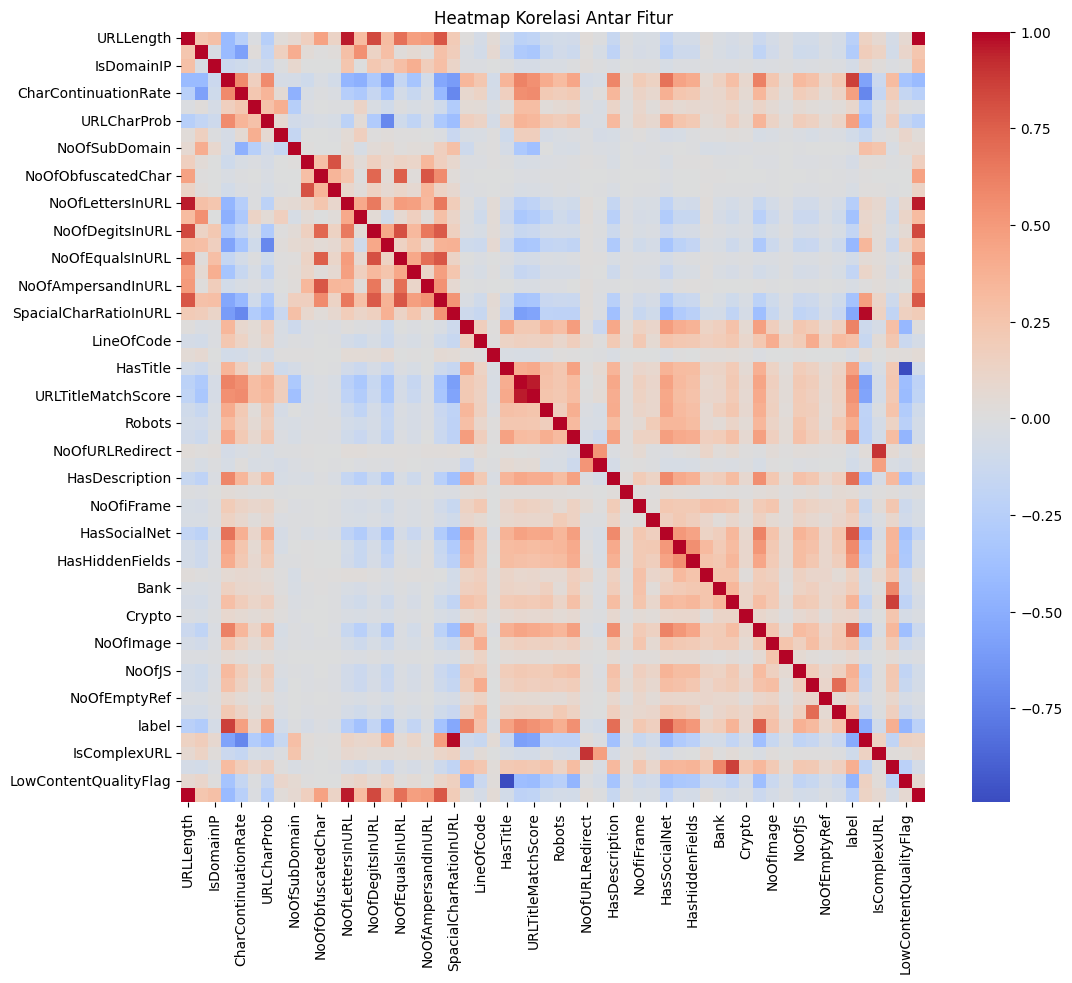

Fitur yang dihapus: ['NoOfLettersInURL', 'URLTitleMatchScore', 'SpecialCharRatio', 'IsComplexURL', 'LowContentQualityFlag', 'URLCharLength']
Jumlah fitur awal : 56
Jumlah fitur akhir: 50


In [ ]:
#@title FEATURE SELECTION

df_numeric = df_fe.select_dtypes(include=['int64', 'float64'])
#============================================================
plt.figure(figsize=(12, 10))
sns.heatmap(df_numeric.corr(), cmap='coolwarm')
plt.title('Heatmap Korelasi Antar Fitur')
plt.show()
#============================================================

corr_matrix = df_numeric.corr().abs()
upper = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

to_drop = [
    col for col in upper.columns
    if any(upper[col] > 0.9)
]

df_selected = df_numeric.drop(columns=to_drop)
print("Fitur yang dihapus:", to_drop)
print("Jumlah fitur awal :", df_numeric.shape[1])
print("Jumlah fitur akhir:", df_selected.shape[1])


In [ ]:
X = df_selected.drop(columns=['label'])
y = df_selected['label']

print(X.shape)
print(y.shape)


(235795, 49)
(235795,)


# **DATA TRANSFORMATION**

In [ ]:
df_selected

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,ObfuscationRatio,LetterRatioInURL,NoOfDegitsInURL,DegitRatioInURL,NoOfEqualsInURL,NoOfQMarkInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,SpacialCharRatioInURL,IsHTTPS,LineOfCode,LargestLineLength,HasTitle,DomainTitleMatchScore,HasFavicon,Robots,IsResponsive,NoOfURLRedirect,NoOfSelfRedirect,HasDescription,NoOfPopup,NoOfiFrame,HasExternalFormSubmit,HasSocialNet,HasSubmitButton,HasHiddenFields,HasPasswordField,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label,HasFinancialKeyword
0,31,24,0,100.000000,1.000000,0.522907,0.061933,3,1,0,0,0.0,0.581,0,0.000,0,0,0,1,0.032,1,558,9381,1,0.000000,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,0,1,34,20,28,119,0,124,1,1
1,23,16,0,100.000000,0.666667,0.032650,0.050207,2,1,0,0,0.0,0.391,0,0.000,0,0,0,2,0.087,1,618,9381,1,55.555556,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,50,9,8,39,0,217,1,0
2,29,22,0,100.000000,0.866667,0.028555,0.064129,2,2,0,0,0.0,0.517,0,0.000,0,0,0,2,0.069,1,467,682,1,46.666667,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,10,2,7,42,2,5,1,0
3,26,19,0,100.000000,1.000000,0.522907,0.057606,3,1,0,0,0.0,0.500,0,0.000,0,0,0,1,0.038,1,6356,26824,1,0.000000,0,1,1,0,0,0,1,12,0,1,1,1,0,0,1,1,1,3,27,15,22,1,31,1,1
4,33,26,0,100.000000,1.000000,0.079963,0.059441,3,1,0,0,0.0,0.606,0,0.000,0,0,0,1,0.030,1,6089,28404,1,100.000000,0,1,1,1,1,1,0,2,0,1,1,1,0,1,1,0,1,244,15,34,72,1,85,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,29,22,0,100.000000,1.000000,0.522907,0.058739,3,1,0,0,0.0,0.552,0,0.000,0,0,0,1,0.034,1,2007,9381,1,100.000000,1,1,1,0,0,1,0,0,0,1,1,1,0,0,1,0,1,51,7,21,187,2,191,1,1
235791,28,21,0,100.000000,0.785714,0.028555,0.053834,2,2,0,0,0.0,0.500,0,0.000,0,0,0,2,0.071,1,1081,348,1,0.000000,1,0,1,0,0,1,0,0,0,1,1,1,0,0,1,0,0,50,1,7,88,0,31,1,1
235792,30,23,0,100.000000,1.000000,0.003319,0.063093,2,1,0,0,0.0,0.567,0,0.000,0,0,0,1,0.033,1,709,13277,1,100.000000,1,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,27,10,30,58,2,67,1,0
235793,55,47,0,28.157537,0.465116,0.000961,0.050211,3,2,0,0,0.0,0.709,3,0.055,0,0,0,5,0.091,1,125,1807,1,0.000000,0,0,1,0,0,0,0,2,0,0,1,1,1,0,0,0,0,0,0,3,0,0,0,0,0


### Standardization, Normalization

In [ ]:
#@title Definisi Fitur

standard_features = [
    'URLLength', 'DomainLength', 'TLDLength', 'NoOfSubDomain',
    'NoOfObfuscatedChar', 'NoOfEqualsInURL', 'NoOfQMarkInURL',
    'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
    'LineOfCode', 'LargestLineLength',
    'NoOfURLRedirect', 'NoOfSelfRedirect',
    'NoOfPopup', 'NoOfiFrame',
    'NoOfImage', 'NoOfCSS', 'NoOfJS',
    'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef'
]

normalize_features = [
    'URLSimilarityIndex', 'CharContinuationRate',
    'TLDLegitimateProb', 'URLCharProb',
    'LetterRatioInURL', 'DegitRatioInURL',
    'SpacialCharRatioInURL', 'DomainTitleMatchScore',
    'HasFinancialKeyword'
]

In [ ]:
#@title Standarisasi, Normalisasi

scaler_standard = StandardScaler()
scaler_normalize = MinMaxScaler()

df_train = df_fe.copy()

cols_to_drop = ['FILENAME', 'URL', 'Domain', 'Title', 'TLD']
df_train = df_train.drop(columns=cols_to_drop, errors='ignore')

df_train[standard_features] = scaler_standard.fit_transform(
    df_train[standard_features]
)
df_train[normalize_features] = scaler_normalize.fit_transform(
    df_train[normalize_features]
)

df_train = df_train.fillna(0)

print("Total NaN:", df_train.isna().sum().sum())

display(df_train)

Total NaN: 0


,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,ObfuscationRatio,NoOfLettersInURL,LetterRatioInURL,NoOfDegitsInURL,DegitRatioInURL,NoOfEqualsInURL,NoOfQMarkInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,SpacialCharRatioInURL,IsHTTPS,LineOfCode,LargestLineLength,HasTitle,DomainTitleMatchScore,URLTitleMatchScore,HasFavicon,Robots,IsResponsive,NoOfURLRedirect,NoOfSelfRedirect,HasDescription,NoOfPopup,NoOfiFrame,HasExternalFormSubmit,HasSocialNet,HasSubmitButton,HasHiddenFields,HasPasswordField,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label,SpecialCharRatio,IsComplexURL,HasFinancialKeyword,LowContentQualityFlag,URLCharLength
0,-0.086486,0.276436,0,1.000000,1.000000,1.000000,0.678068,0.392745,-0.274154,0,-0.01325,0.0,18,0.627430,0,0.000000,-0.066589,-0.151948,-0.029955,-0.379918,0.080605,1,-0.170734,-0.022395,1,0.000000,0.000000,0,1,1,-0.392410,-0.204408,0,-0.057296,-0.102149,0,0,1,1,0,1,0,0,1,0.099788,0.182551,0.783327,0.305222,-0.134778,0.464130,1,0.032258,0,1.0,0,32
1,-0.280125,-0.597807,0,1.000000,0.666667,0.062440,0.547403,-1.274652,-0.274154,0,-0.01325,0.0,9,0.422246,0,0.000000,-0.066589,-0.151948,-0.029955,-0.096439,0.219144,1,-0.153190,-0.022395,1,0.555556,55.555556,1,1,0,-0.392410,-0.204408,0,-0.057296,-0.275683,0,1,1,0,0,0,0,0,1,0.301270,0.035622,-0.113046,-0.147555,-0.134778,1.041672,1,0.086957,0,0.0,0,24
2,-0.134896,0.057875,0,1.000000,0.866667,0.054608,0.702533,-1.274652,1.389828,0,-0.01325,0.0,15,0.558315,0,0.000000,-0.066589,-0.151948,-0.029955,-0.096439,0.173804,1,-0.197343,-0.079550,1,0.466667,46.666667,0,1,1,-0.392410,-0.204408,1,-0.057296,-0.275683,0,0,1,1,0,0,0,0,1,-0.202435,-0.057878,-0.157865,-0.130576,-0.021406,-0.274876,1,0.068966,0,0.0,0,30
3,-0.207510,-0.269966,0,1.000000,1.000000,1.000000,0.629847,0.392745,-0.274154,0,-0.01325,0.0,13,0.539957,0,0.000000,-0.066589,-0.151948,-0.029955,-0.379918,0.095718,1,1.524616,0.092210,1,0.000000,0.000000,0,1,1,-0.392410,-0.204408,0,0.201067,1.806728,0,1,1,1,0,0,1,1,1,-0.290583,0.276051,0.200684,-0.243770,-0.078092,-0.113413,1,0.038462,0,1.0,0,27
4,-0.038077,0.494997,0,1.000000,1.000000,0.152920,0.650301,0.392745,-0.274154,0,-0.01325,0.0,20,0.654428,0,0.000000,-0.066589,-0.151948,-0.029955,-0.379918,0.075567,1,1.446544,0.102591,1,1.000000,100.000000,0,1,1,2.548356,4.892176,1,-0.057296,0.071385,0,1,1,1,0,1,1,0,1,2.744236,0.115765,1.052238,0.039216,-0.078092,0.221935,1,0.030303,1,1.0,0,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,-0.134896,0.057875,0,1.000000,1.000000,1.000000,0.642470,0.392745,-0.274154,0,-0.01325,0.0,16,0.596112,0,0.000000,-0.066589,-0.151948,-0.029955,-0.379918,0.085642,1,0.252957,-0.022395,1,1.000000,100.000000,1,1,1,-0.392410,-0.204408,1,-0.057296,-0.275683,0,1,1,1,0,0,1,0,1,0.313862,0.008908,0.469596,0.690083,-0.021406,0.880209,1,0.034483,0,1.0,0,30
235791,-0.159101,-0.051405,0,1.000000,0.785714,0.054608,0.587816,-1.274652,1.389828,0,-0.01325,0.0,14,0.539957,0,0.000000,-0.066589,-0.151948,-0.029955,-0.096439,0.178841,1,-0.017807,-0.081744,1,0.000000,0.000000,1,0,1,-0.392410,-0.204408,1,-0.057296,-0.275683,0,1,1,1,0,0,1,0,0,0.301270,-0.071235,-0.157865,0.129771,-0.134778,-0.113413,1,0.071429,0,1.0,0,29
235792,-0.110691,0.167156,0,1.000000,1.000000,0.006347,0.690997,-1.274652,-0.274154,0,-0.01325,0.0,17,0.612311,0,0.000000,-0.066589,-0.151948,-0.029955,-0.379918,0.083123,1,-0.126581,0.003203,1,1.000000,100.000000,1,1,1,-0.392410,-0.204408,1,-0.057296,-0.275683,0,1,1,0,0,0,0,0,1,0.011639,0.048979,0.872964,-0.040021,-0.021406,0.110152,1,0.033333,0,0.0,0,31
235793,0.494430,2.789885,0,0.280456,0.465116,0.001838,0.547442,0.392745,1.389828,0,-0.01325,0.0,39,0.765659,3,0.080409,-0.066589,-0.151

In [ ]:
#@title One-Hot Encoding

#-

# Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split

X = df_train.drop(columns=['label'])
y = df_train['label']

X_train, X_temp, y_train, y_temp = train_test_split(
    X,
    y,
    test_size=0.30,
    stratify=y,
    random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp,
    y_temp,
    test_size=0.50,   # 15% test, 15% validation
    stratify=y_temp,
    random_state=42
)

print("Train size:", X_train.shape)
print("Validation size:", X_val.shape)
print("Test size:", X_test.shape)

display(X)

Train size: (165056, 55)
Validation size: (35369, 55)
Test size: (35370, 55)


,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,ObfuscationRatio,NoOfLettersInURL,LetterRatioInURL,NoOfDegitsInURL,DegitRatioInURL,NoOfEqualsInURL,NoOfQMarkInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,SpacialCharRatioInURL,IsHTTPS,LineOfCode,LargestLineLength,HasTitle,DomainTitleMatchScore,URLTitleMatchScore,HasFavicon,Robots,IsResponsive,NoOfURLRedirect,NoOfSelfRedirect,HasDescription,NoOfPopup,NoOfiFrame,HasExternalFormSubmit,HasSocialNet,HasSubmitButton,HasHiddenFields,HasPasswordField,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,SpecialCharRatio,IsComplexURL,HasFinancialKeyword,LowContentQualityFlag,URLCharLength
0,-0.086486,0.276436,0,1.000000,1.000000,1.000000,0.678068,0.392745,-0.274154,0,-0.01325,0.0,18,0.627430,0,0.000000,-0.066589,-0.151948,-0.029955,-0.379918,0.080605,1,-0.170734,-0.022395,1,0.000000,0.000000,0,1,1,-0.392410,-0.204408,0,-0.057296,-0.102149,0,0,1,1,0,1,0,0,1,0.099788,0.182551,0.783327,0.305222,-0.134778,0.464130,0.032258,0,1.0,0,32
1,-0.280125,-0.597807,0,1.000000,0.666667,0.062440,0.547403,-1.274652,-0.274154,0,-0.01325,0.0,9,0.422246,0,0.000000,-0.066589,-0.151948,-0.029955,-0.096439,0.219144,1,-0.153190,-0.022395,1,0.555556,55.555556,1,1,0,-0.392410,-0.204408,0,-0.057296,-0.275683,0,1,1,0,0,0,0,0,1,0.301270,0.035622,-0.113046,-0.147555,-0.134778,1.041672,0.086957,0,0.0,0,24
2,-0.134896,0.057875,0,1.000000,0.866667,0.054608,0.702533,-1.274652,1.389828,0,-0.01325,0.0,15,0.558315,0,0.000000,-0.066589,-0.151948,-0.029955,-0.096439,0.173804,1,-0.197343,-0.079550,1,0.466667,46.666667,0,1,1,-0.392410,-0.204408,1,-0.057296,-0.275683,0,0,1,1,0,0,0,0,1,-0.202435,-0.057878,-0.157865,-0.130576,-0.021406,-0.274876,0.068966,0,0.0,0,30
3,-0.207510,-0.269966,0,1.000000,1.000000,1.000000,0.629847,0.392745,-0.274154,0,-0.01325,0.0,13,0.539957,0,0.000000,-0.066589,-0.151948,-0.029955,-0.379918,0.095718,1,1.524616,0.092210,1,0.000000,0.000000,0,1,1,-0.392410,-0.204408,0,0.201067,1.806728,0,1,1,1,0,0,1,1,1,-0.290583,0.276051,0.200684,-0.243770,-0.078092,-0.113413,0.038462,0,1.0,0,27
4,-0.038077,0.494997,0,1.000000,1.000000,0.152920,0.650301,0.392745,-0.274154,0,-0.01325,0.0,20,0.654428,0,0.000000,-0.066589,-0.151948,-0.029955,-0.379918,0.075567,1,1.446544,0.102591,1,1.000000,100.000000,0,1,1,2.548356,4.892176,1,-0.057296,0.071385,0,1,1,1,0,1,1,0,1,2.744236,0.115765,1.052238,0.039216,-0.078092,0.221935,0.030303,1,1.0,0,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,-0.134896,0.057875,0,1.000000,1.000000,1.000000,0.642470,0.392745,-0.274154,0,-0.01325,0.0,16,0.596112,0,0.000000,-0.066589,-0.151948,-0.029955,-0.379918,0.085642,1,0.252957,-0.022395,1,1.000000,100.000000,1,1,1,-0.392410,-0.204408,1,-0.057296,-0.275683,0,1,1,1,0,0,1,0,1,0.313862,0.008908,0.469596,0.690083,-0.021406,0.880209,0.034483,0,1.0,0,30
235791,-0.159101,-0.051405,0,1.000000,0.785714,0.054608,0.587816,-1.274652,1.389828,0,-0.01325,0.0,14,0.539957,0,0.000000,-0.066589,-0.151948,-0.029955,-0.096439,0.178841,1,-0.017807,-0.081744,1,0.000000,0.000000,1,0,1,-0.392410,-0.204408,1,-0.057296,-0.275683,0,1,1,1,0,0,1,0,0,0.301270,-0.071235,-0.157865,0.129771,-0.134778,-0.113413,0.071429,0,1.0,0,29
235792,-0.110691,0.167156,0,1.000000,1.000000,0.006347,0.690997,-1.274652,-0.274154,0,-0.01325,0.0,17,0.612311,0,0.000000,-0.066589,-0.151948,-0.029955,-0.379918,0.083123,1,-0.126581,0.003203,1,1.000000,100.000000,1,1,1,-0.392410,-0.204408,1,-0.057296,-0.275683,0,1,1,0,0,0,0,0,1,0.011639,0.048979,0.872964,-0.040021,-0.021406,0.110152,0.033333,0,0.0,0,31
235793,0.494430,2.789885,0,0.280456,0.465116,0.001838,0.547442,0.392745,1.389828,0,-0.01325,0.0,39,0.765659,3,0.080409,-0.066589,-0.151948,-0.029955,0.753998,0.2

# **MODELING**

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

logreg_baseline = LogisticRegression(
    C=1.0,
    solver='lbfgs',
    max_iter=100,
    random_state=42
)

logreg_baseline.fit(X_train, y_train)
#===
y_pred_train = logreg_baseline.predict(X_train)

print("=== Hasil Evaluasi (Training Set) ===")
print(f"Akurasi: {accuracy_score(y_train, y_pred_train):.4f}")
print("\nClassification Report:")
print(classification_report(y_train, y_pred_train))
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_pred_train))

# ===
y_pred_val = logreg_baseline.predict(X_val)

print("\n=== Hasil Evaluasi (Validation Set) ===")
print(f"Akurasi: {accuracy_score(y_val, y_pred_val):.4f}")
print("\nClassification Report:")
print(classification_report(y_val, y_pred_val))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred_val))


# ===
y_pred_test = logreg_baseline.predict(X_test)

print("\n=== Hasil Evaluasi Akhir (Test Set) ===")
print(f"Akurasi: {accuracy_score(y_test, y_pred_test):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


=== Hasil Evaluasi (Training Set) ===
Akurasi: 0.9998

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70661
           1       1.00      1.00      1.00     94395

    accuracy                           1.00    165056
   macro avg       1.00      1.00      1.00    165056
weighted avg       1.00      1.00      1.00    165056

Confusion Matrix:
[[70631    30]
 [    1 94394]]

=== Hasil Evaluasi (Validation Set) ===
Akurasi: 0.9999

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15142
           1       1.00      1.00      1.00     20227

    accuracy                           1.00     35369
   macro avg       1.00      1.00      1.00     35369
weighted avg       1.00      1.00      1.00     35369

Confusion Matrix:
[[15139     3]
 [    2 20225]]

=== Hasil Evaluasi Akhir (Test Set) ===
Akurasi: 0.9998

Classification Report:
        

In [ ]:
from sklearn.model_selection import train_test_split

X = df_train.drop(columns=['label'])
y = df_train['label']

X_train, X_temp, y_train, y_temp = train_test_split(
    X,
    y,
    test_size=0.30,
    stratify=y,
    random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp,
    y_temp,
    test_size=0.50,   # 15% validation, 15% test
    stratify=y_temp,
    random_state=42
)

print("Train size:", X_train.shape)
print("Validation size:", X_val.shape)
print("Test size:", X_test.shape)

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

xgb_model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    n_estimators=100,
    max_depth=10,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [6, 10],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8],
    'colsample_bytree': [0.8]
}

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

best_xgb_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

y_pred_train = best_xgb_model.predict(X_train)

print("\n=== Evaluasi Training Set ===")
print(f"Akurasi: {accuracy_score(y_train, y_pred_train):.4f}")
print(classification_report(y_train, y_pred_train))
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_pred_train))

y_pred_val = best_xgb_model.predict(X_val)

print("\n=== Evaluasi Validation Set ===")
print(f"Akurasi: {accuracy_score(y_val, y_pred_val):.4f}")
print(classification_report(y_val, y_pred_val))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred_val))

y_pred_test = best_xgb_model.predict(X_test)

print("\n=== Evaluasi Test Set (FINAL) ===")
print(f"Akurasi: {accuracy_score(y_test, y_pred_test):.4f}")
print(classification_report(y_test, y_pred_test))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))


Train size: (165056, 55)
Validation size: (35369, 55)
Test size: (35370, 55)
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.8}

=== Evaluasi Training Set ===
Akurasi: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70661
           1       1.00      1.00      1.00     94395

    accuracy                           1.00    165056
   macro avg       1.00      1.00      1.00    165056
weighted avg       1.00      1.00      1.00    165056

Confusion Matrix:
[[70659     2]
 [    0 94395]]

=== Evaluasi Validation Set ===
Akurasi: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15142
           1       1.00      1.00      1.00     20227

    accuracy                           1.00     35369
   macro avg       1.00      1.00      1.00     3536

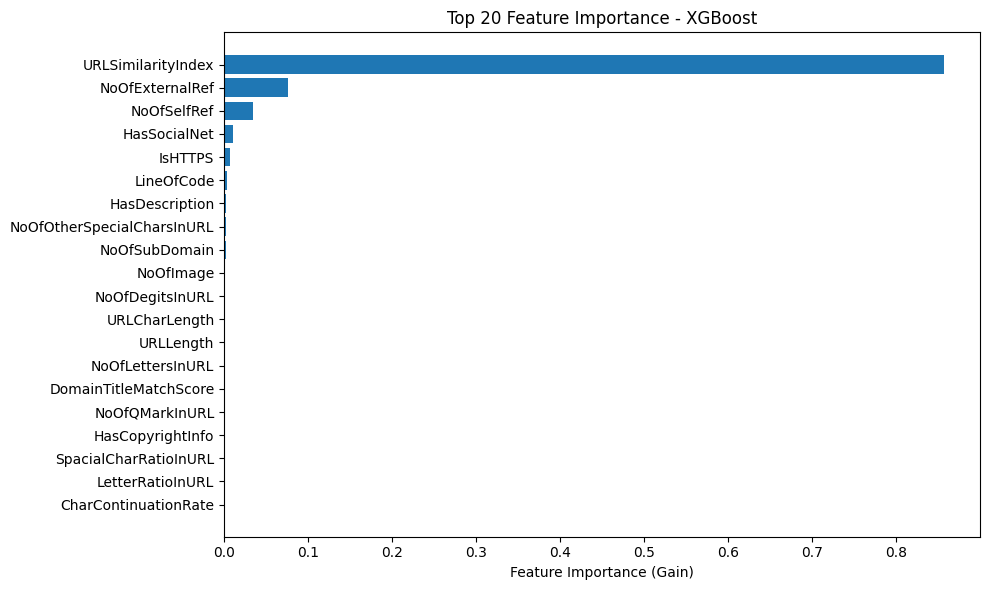

In [ ]:
importance = best_xgb_model.feature_importances_

# Buat DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Ambil Top 20 agar plot terbaca
top_features = feature_importance_df.head(20)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.gca().invert_yaxis()
plt.xlabel("Feature Importance (Gain)")
plt.title("Top 20 Feature Importance - XGBoost")
plt.tight_layout()
plt.show()

In [ ]:
#@title Implementasi DeepLearning + Evaluasi

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time
import numpy as np

input_dim = X_train.shape[1]

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

model_dl = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(input_dim,)),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

model_dl.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

start_train = time.time()

history = model_dl.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

end_train = time.time()
training_time = end_train - start_train

start_infer = time.time()

y_pred_prob = model_dl.predict(X_test)
y_pred = (y_pred_prob >= 0.5).astype(int).ravel()

end_infer = time.time()
inference_time = end_infer - start_infer

accuracy  = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall    = recall_score(y_test, y_pred)
f1        = f1_score(y_test, y_pred)

print("\n=== Evaluasi Model Deep Learning (Test Set) ===")
print(f"Accuracy      : {accuracy:.4f}")
print(f"Precision     : {precision:.4f}")
print(f"Recall        : {recall:.4f}")
print(f"F1-Score      : {f1:.4f}")
print(f"Training Time : {training_time:.2f} detik")
print(f"Inference Time: {inference_time:.4f} detik")


Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5158/5158 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9372 - loss: 0.2149 - val_accuracy: 0.9990 - val_loss: 0.0035
Epoch 2/50
5158/5158 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9978 - loss: 0.0064 - val_accuracy: 0.9992 - val_loss: 0.0029
Epoch 3/50
5158/5158 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9985 - loss: 0.0051 - val_accuracy: 0.9990 - val_loss: 0.0032
Epoch 4/50
5158/5158 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9988 - loss: 0.0042 - val_accuracy: 0.9996 - val_loss: 0.0017
Epoch 5/50
5158/5158 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9989 - loss: 0.0039 - val_accuracy: 0.9997 - val_loss: 0.0013
Epoch 6/50
5158/5158 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9990 - loss: 0.0033 - val_accuracy: 0.9997 - val_loss: 0.0012
Epoch 7/50
5158/5158 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9991 - loss: 0.0032 - val_accuracy: 0.9991 - val_loss: 0.0049
Epoch 8/50
5158/5158 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9991 - loss: 0.0036 - val_accu

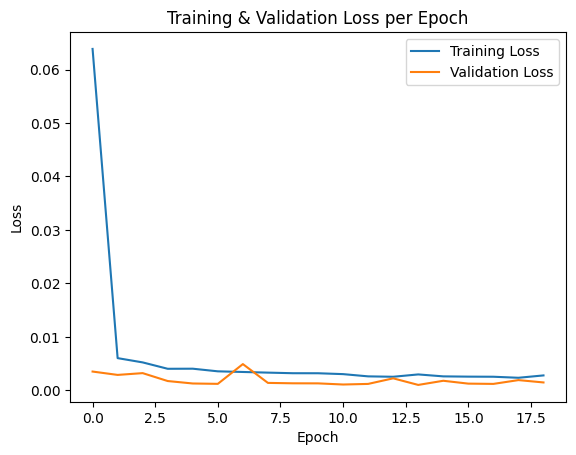

In [ ]:
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training & Validation Loss per Epoch')
plt.legend()
plt.show()

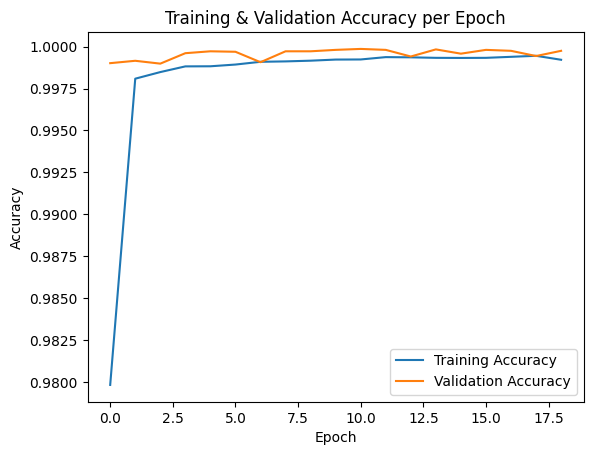

In [ ]:
  plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy per Epoch')
plt.legend()
plt.show()